## Regimes do modelo Erdős–Rényi



### Utilizando o graph-tool ou o networkx, reconstrua experimentalmente a figura do slide 29 da semana 2, que apresentam os regimes do modelo Erdős–Rényi:

    Gere redes ER com n = 100 vértices, variando gradualmente o grau médio (ajuste a escolha de p de acordo);
    Para cada valor de grau médio, gere múltiplas instâncias do grafo ER;
    Utilize-as como amostras para estimar o tamanho médio da GCC. (Quanto mais instâncias, melhores as estimativas. Sugiro ao menos 100 instâncias.)
    Gere um plot e verifique visualmente onde estão o ponto crítico e o final do regime supercrítico.

### Perguntas adicionais:

    Utilizando escala log (no eixo x e/ou no eixo y), a transição de fase no ponto crítico fica mais "chamativa"?
    E se plotarmos também o tamanho médio das componentes isoladas? Vemos uma transição de fase no ponto crítico para essa métrica?



### Importando dependências

In [15]:
import networkx as nx
import matplotlib.pyplot as plot
import numpy as np
import math

### Gerando redes ER variando o grau médio <d>

In [25]:
n = 100 # número de vértices
num_instancias = 500 # número de amostras para cada valor de <k>
k_valores = np.linspace(0, 5, 100) # valores de grau médio <k>

avg_gcc_tam = []
avg_componentes_isolados_tam = []
#
for k in k_valores:
    p = k / (n - 1)
    gcc_tam = []
    isolated_tam = []

    for _ in range(num_instancias):
        # . Criando um grafo Erdős–Rényi
        G = nx.erdos_renyi_graph(n, p)

        # . Obtendo tamanho das CC e a GCC
        componentes = [len(c) for c in nx.connected_components(G)]
        maior = max(componentes)
        gcc_tam.append(maior / n)

        # . Obtendo tamanho médio das componentes isoladas (<> GCC)
        if len(componentes) > 1:
            tamanhos_isolados = [tam for tam in componentes if tam != maior]
            if tamanhos_isolados:
                isolated_tam.append(np.mean(tamanhos_isolados))
            else:
                isolated_tam.append(0)
        else:
            isolated_tam.append(0)

    avg_gcc_tam.append(np.mean(gcc_tam))
    avg_componentes_isolados_tam.append(np.mean(isolated_tam))

isolate_components = avg_componentes_isolados_tam


### Gerando o plot


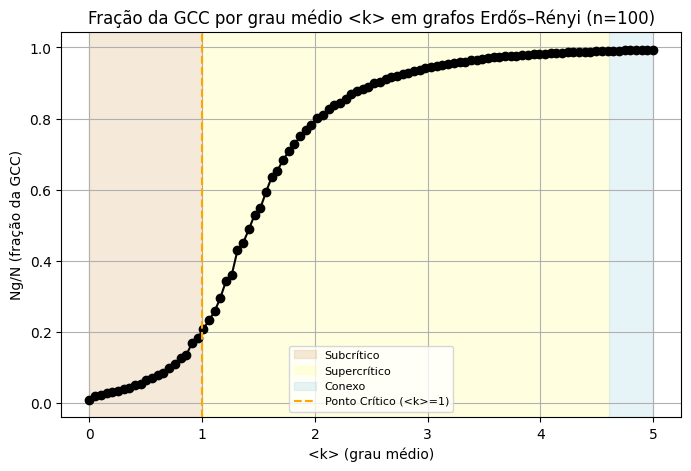

log(n): 4.6


In [49]:
plot.figure(figsize=(8, 5))

# Área subcrítica: <k> < 1 (marrom claro)
plot.axvspan(0, 1, color='#deb887', alpha=0.3, label='Subcrítico')

# Área supercrítica: 1 < <k> < log(n) (amarelo claro)
logn = math.log(n)
plot.axvspan(1, logn, color='#ffff99', alpha=0.3, label='Supercrítico')

# Área conexa: <k> > log(n) (azul claro)
plot.axvspan(logn, k_valores[-1], color='#add8e6', alpha=0.3, label='Conexo')

plot.plot(k_valores, avg_gcc_tam, marker='o', color='black')
plot.axvline(x=1, color='orange', linestyle='--', label='Ponto Crítico (<k>=1)')
plot.xlabel('<k> (grau médio)')
plot.ylabel('Ng/N (fração da GCC)')
plot.title('Fração da GCC por grau médio <k> em grafos Erdős–Rényi (n=100)')
plot.grid(True)
plot.legend(prop={'size': 8})
plot.show()

print(f"log(n): {logn:.1f}")

##### **Analisando:**
O ponto crítico em \<k\>=1 é visivel de forma clara, onde a fração da GCC começa a aumentar rapidamente (apesar de já vir numa crescente mais suave antes do ponto crítico).

O final do regime supercrítico, próximo a \<k\>=log(n) \[neste caso, aproximadamente 4.6\], também é observável, onde a fração da GCC se aproxima de 1.

 ---

### **Adicional:** *Utilizando escala log (no eixo x e/ou no eixo y), a transição de fase no ponto crítico fica mais "chamativa"?*

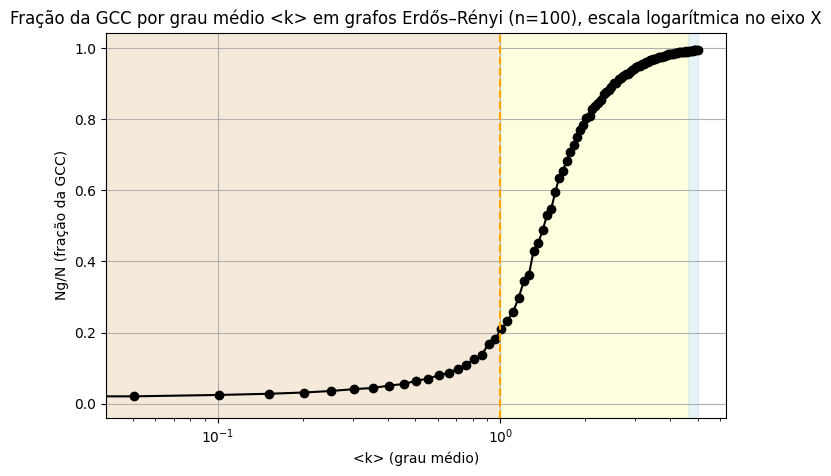

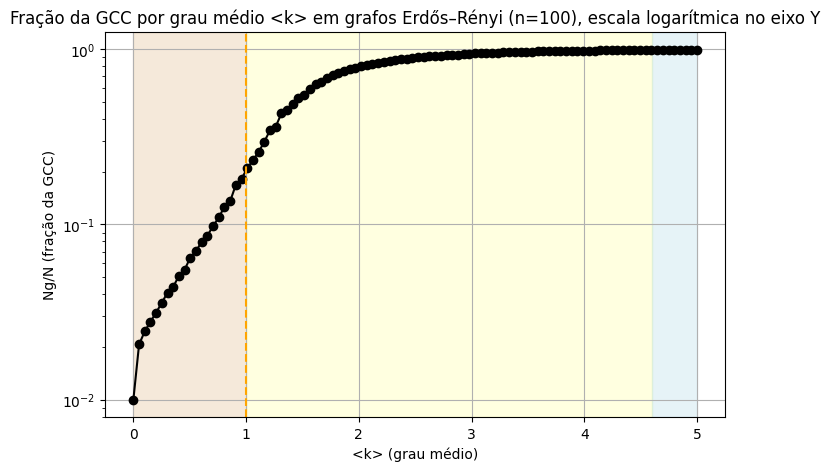

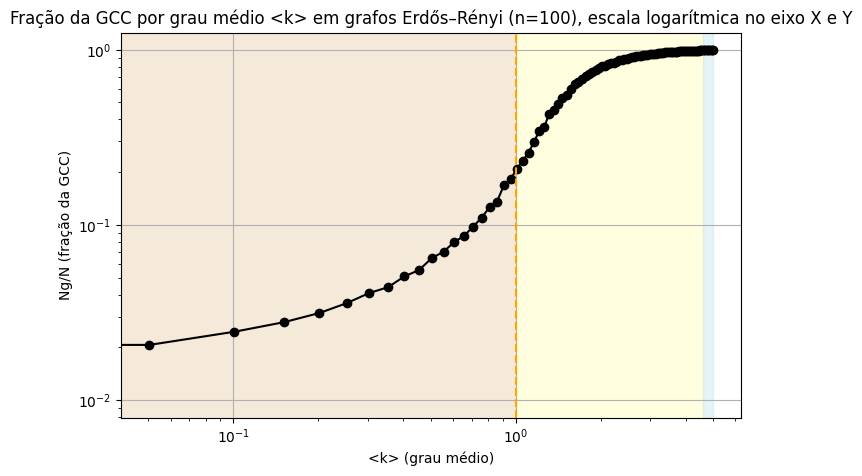

In [41]:
# !!! Logaritmica no eixo X
plot.figure(figsize=(8, 5))

# Área subcrítica: <k> < 1 (marrom claro)
plot.axvspan(0, 1, color='#deb887', alpha=0.3, label='Subcrítico')

# Área supercrítica: 1 < <k> < log(n) (amarelo claro)
plot.axvspan(1, logn, color='#ffff99', alpha=0.3, label='Supercrítico')

# Área conexa: <k> > log(n) (azul claro)
plot.axvspan(logn, k_valores[-1], color='#add8e6', alpha=0.3, label='Conexo')

plot.semilogx(k_valores, avg_gcc_tam, marker='o', color='black')
plot.axvline(x=1, color='orange', linestyle='--', label='Ponto Crítico (<k>=1)')
plot.xlabel('<k> (grau médio)')
plot.ylabel('Ng/N (fração da GCC)')
plot.title('Fração da GCC por grau médio <k> em grafos Erdős–Rényi (n=100), escala logarítmica no eixo X')
plot.grid(True)
plot.show()


# !!! Logaritmica no eixo Y
plot.figure(figsize=(8, 5))

# Área subcrítica: <k> < 1 (marrom claro)
plot.axvspan(0, 1, color='#deb887', alpha=0.3, label='Subcrítico')

# Área supercrítica: 1 < <k> < log(n) (amarelo claro)
plot.axvspan(1, logn, color='#ffff99', alpha=0.3, label='Supercrítico')

# Área conexa: <k> > log(n) (azul claro)
plot.axvspan(logn, k_valores[-1], color='#add8e6', alpha=0.3, label='Conexo')

plot.semilogy(k_valores, avg_gcc_tam, marker='o', color='black')
plot.axvline(x=1, color='orange', linestyle='--', label='Ponto Crítico (<k>=1)')
plot.xlabel('<k> (grau médio)')
plot.ylabel('Ng/N (fração da GCC)')
plot.title('Fração da GCC por grau médio <k> em grafos Erdős–Rényi (n=100), escala logarítmica no eixo Y')
plot.grid(True)
plot.show()


# !!! Logaritmica no eixo X e Y
plot.figure(figsize=(8, 5))

# Área subcrítica: <k> < 1 (marrom claro)
plot.axvspan(0, 1, color='#deb887', alpha=0.3, label='Subcrítico')

# Área supercrítica: 1 < <k> < log(n) (amarelo claro)
plot.axvspan(1, logn, color='#ffff99', alpha=0.3, label='Supercrítico')

# Área conexa: <k> > log(n) (azul claro)
plot.axvspan(logn, k_valores[-1], color='#add8e6', alpha=0.3, label='Conexo')

plot.loglog(k_valores, avg_gcc_tam, marker='o', color='black')
plot.axvline(x=1, color='orange', linestyle='--', label='Ponto Crítico (<k>=1)')
plot.xlabel('<k> (grau médio)')
plot.ylabel('Ng/N (fração da GCC)')
plot.title('Fração da GCC por grau médio <k> em grafos Erdős–Rényi (n=100), escala logarítmica no eixo X e Y')
plot.grid(True)
plot.show()

##### **Analisando:**
Ao utilizar a escala logaritmica somente no eixo X, é visto de forma mais clara o crescimento mais suave antes do ponto crítico, e a transição em \<k\>=1 mais grosseira.

Já com a escala logaritmica somente no eixo Y e nos 2 eixos, a transição de fase em \<k\>=1 não fica tão evidente (aparenta até que o crescimento mais grosseiro acontece antes do ponto crítico).

 ---

### **Adicional:** *E se plotarmos também o tamanho médio das componentes isoladas? Vemos uma transição de fase no ponto crítico para essa métrica?*

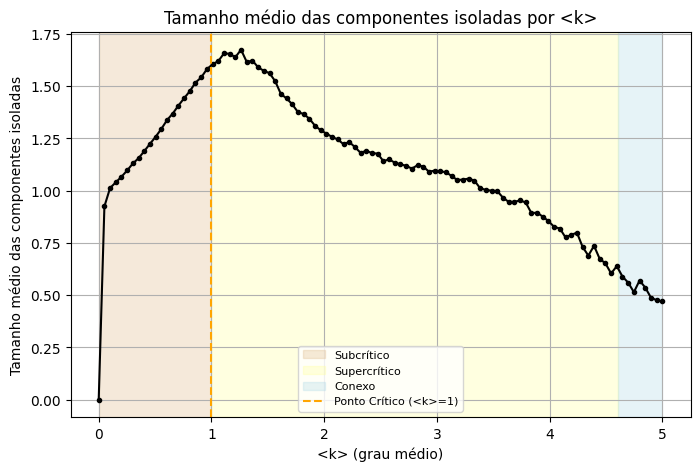

In [48]:
plot.figure(figsize=(8, 5))

# Área subcrítica: <k> < 1 (marrom claro)
plot.axvspan(0, 1, color='#deb887', alpha=0.3, label='Subcrítico')

# Área supercrítica: 1 < <k> < log(n) (amarelo claro)
plot.axvspan(1, logn, color='#ffff99', alpha=0.3, label='Supercrítico')

# Área conexa: <k> > log(n) (azul claro)
plot.axvspan(logn, k_valores[-1], color='#add8e6', alpha=0.3, label='Conexo')

plot.plot(k_valores, avg_componentes_isolados_tam, marker='o', markersize=3, color='black')
plot.axvline(x=1, color='orange', linestyle='--', label='Ponto Crítico (<k>=1)')
plot.title('Tamanho médio das componentes isoladas por <k>')
plot.xlabel('<k> (grau médio)')
plot.ylabel('Tamanho médio das componentes isoladas')
plot.grid(True)
plot.legend(prop={'size': 8})
plot.show()

##### **Analisando:**
Ao plotar o tamanho médio das componentes isoladas pelo grau médio é possível observar que antes do ponto crítico há uma tendência de crescimento das componentes isoladas, e após o ponto crítico, uma tendência de queda, indicando que as componentes isoladas começam a se fundir na GCC.

Analisando pelo ponto de vista da probabilidade de conexão de nós em um grafo Erdős–Rényi, antes do ponto crítico, a probabilidade de conexão é baixa, resultando em várias componentes isoladas. À medida que a probabilidade aumenta e ultrapassa o ponto crítico, essas componentes começam a se conectar, formando uma GCC dominante e reduzindo o tamanho médio das componentes isoladas.